In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### 1. Overview

In [2]:
dataset = pd.read_csv('data/Speed Dating Data.csv', encoding='ISO-8859-1')
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'The dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns')

The dataset contains 8378 rows and 195 columns


Let's observe some basic statistics. The table below shows that there are lots of missing values in our datasets. We should analyse this further and see if we can drop some columns and herefore make our analysis simpler.

In [4]:
print(dataset.describe().T.to_string())

           count        mean         std    min     25%     50%      75%     max
iid       8378.0  283.675937  158.583367   1.00  154.00  281.00  407.000  552.00
id        8377.0    8.960248    5.491329   1.00    4.00    8.00   13.000   22.00
gender    8378.0    0.500597    0.500029   0.00    0.00    1.00    1.000    1.00
idg       8378.0   17.327166   10.940735   1.00    8.00   16.00   26.000   44.00
condtn    8378.0    1.828837    0.376673   1.00    2.00    2.00    2.000    2.00
wave      8378.0   11.350919    5.995903   1.00    7.00   11.00   15.000   21.00
round     8378.0   16.872046    4.358458   5.00   14.00   18.00   20.000   22.00
position  8378.0    9.042731    5.514939   1.00    4.00    8.00   13.000   22.00
positin1  6532.0    9.295775    5.650199   1.00    4.00    9.00   14.000   22.00
order     8378.0    8.927668    5.477009   1.00    4.00    8.00   13.000   22.00
partner   8378.0    8.963595    5.491068   1.00    4.00    8.00   13.000   22.00
pid       8368.0  283.863767

First of all, there seems to be lots of null values in this datasets. We will look at dropping columns with too many missing values.
Secondly, we have lots of columns ! We will discard all columns ending by "_3". We are interested in knowing how to get a match at the end of the speed dating but all these columns are related to a questionnaire sent 3 weeks after the speed dating. Let's drop them to make the analysis simpler.

Let's take a closer look at the missing values of our dataset by calculting the percentage of missing values for each features.

### 2. Columns with missing values

In [5]:
def missing_values(dataset):
    perc_missing = dataset.isnull().sum() * 100 / dataset.shape[0]
    perc_missing_df = pd.DataFrame({'feature' :perc_missing.index, 'perc_missing': perc_missing}).reset_index(drop=True)
    perc_missing_df.sort_values(by='perc_missing', ascending=False, inplace=True)
    return perc_missing_df 

In [6]:
perc_missing_df = missing_values(dataset)
perc_missing_df.head(50)

,feature,perc_missing
160,num_in_3,92.026737
159,numdat_3,82.143710
68,expnum,78.515159
123,sinc7_2,76.665075
126,amb7_2,76.665075
127,shar7_2,76.438291
122,attr7_2,76.318931
124,intel7_2,76.318931
125,fun7_2,76.318931
194,amb5_3,75.936978


It looks like lots of columns with missing values are ending with "_3", "_2" or "_s". They are responses to a survey filled by candidates half way through the night the day after and a few weeks later. For each questions they have to distribute 100 or 10 points between answers. Let's check if the missing values are actual missing values or if they can be imputed by 0

In [7]:
columns_5_2 = [column for column in dataset.columns if column.endswith('5_2')]
dataset.loc[dataset['sinc5_2'].isnull(), columns_5_2]

,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8263,NaN,NaN,NaN,NaN,NaN
8264,NaN,NaN,NaN,NaN,NaN
8265,NaN,NaN,NaN,NaN,NaN
8266,NaN,NaN,NaN,NaN,NaN


In [8]:
columns_3_s = [column for column in dataset.columns if column.endswith('3_s')]
dataset.loc[dataset['sinc3_s'].isnull(), columns_3_s]

,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8373,NaN,NaN,NaN,NaN,NaN
8374,NaN,NaN,NaN,NaN,NaN
8375,NaN,NaN,NaN,NaN,NaN
8376,NaN,NaN,NaN,NaN,NaN


It looks like lots of candidates did not reply to these surveys. Let's drop these columns

In [9]:
columns_to_drop = [column for column in dataset.columns if (column.endswith('_2') or column.endswith('_s') or column.endswith('_3'))]
dataset.drop(columns = columns_to_drop, inplace=True)

If we now look at our missing values dataframe, we can still see that some columns have lots of them. Let's drop all the columns with more than 25% of missing values.

In [10]:
perc_missing_df=missing_values(dataset)
perc_missing_df.head(25)

,feature,perc_missing
68,expnum,78.515159
37,mn_sat,62.604440
38,tuition,57.233230
110,them_cal,52.566245
109,you_call,52.566245
44,income,48.925758
93,sinc5_1,41.441872
95,fun5_1,41.441872
94,intel5_1,41.441872
92,attr5_1,41.441872


In [11]:
columns_to_drop = perc_missing_df.loc[perc_missing_df['perc_missing'] > 25, 'feature'].tolist()
dataset.drop(columns = columns_to_drop, inplace=True)
dataset.shape

(8378, 99)

We dropped almost half the columns of our dataset

### 3. Basic statistics
#### 3.1 Categorical variables

In [154]:
dataset['field_cd'].fillna(-1, inplace=True)
dataset['race'].fillna(-1, inplace=True)
dataset['goal'].fillna(-1, inplace=True)
dataset['career_c'].fillna(-1, inplace=True)

dataset[activities_columns].fillna(-1, inplace=True)
unique_persons = dataset.groupby(by=['iid'], as_index=False).first()

/tmp/ipykernel_56/1606335779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[activities_columns].fillna(-1, inplace=True)


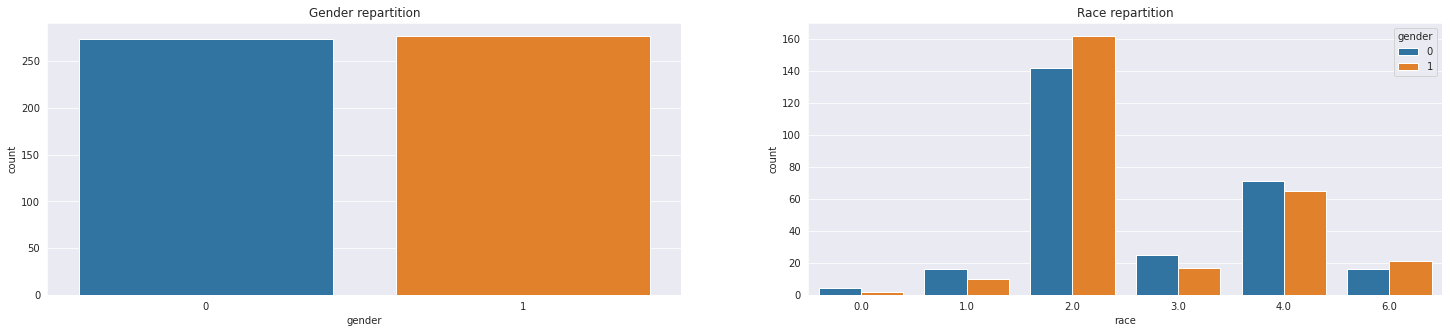

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.countplot(data=unique_persons, x='gender', ax=axes[0]).set(title='Gender repartition');
sns.countplot(data=unique_persons, x='race', hue='gender', ax=axes[1]).set(title='Race repartition');

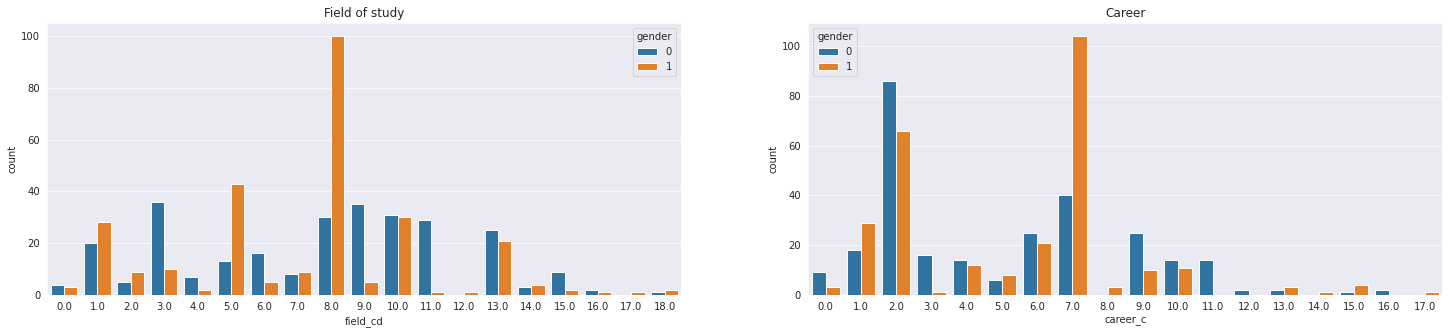

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.countplot(data=unique_persons, x='field_cd', hue='gender', ax=axes[0]).set(title='Field of study');
sns.countplot(data=unique_persons, x='career_c', hue='gender', ax=axes[1]).set(title='Career');

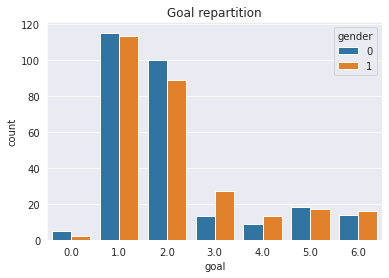

In [158]:
sns.countplot(data=unique_persons, x='goal', hue='gender').set(title='Goal repartition');

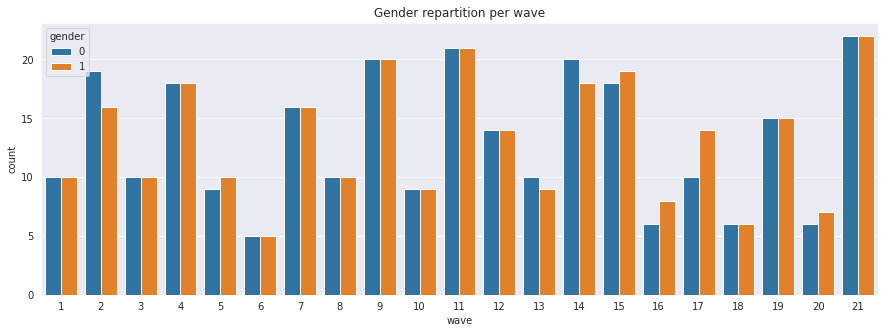

In [159]:
plt.figure(figsize=(15,5))
unique_persons_per_wave = dataset.groupby(by=['iid','gender', 'wave'], as_index=False).first()
sns.countplot(data=unique_persons_per_wave, x='wave', hue='gender').set(title='Gender repartition per wave');

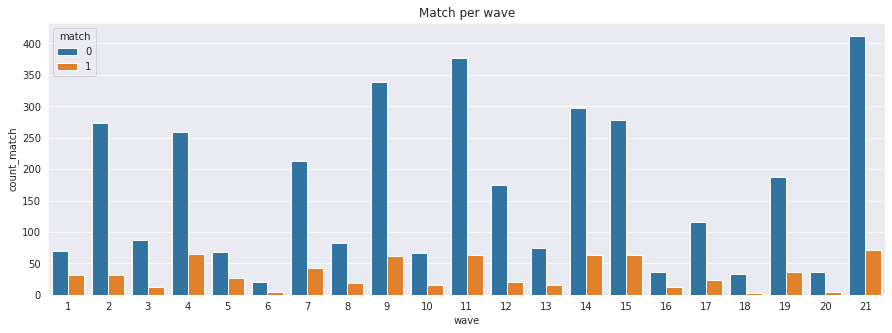

In [160]:
plt.figure(figsize=(15,5))
match_per_wave = dataset.groupby(['wave', 'match']).agg(count_match = ('match', lambda x: int(x.count() / 2))).reset_index() 
sns.barplot(data=match_per_wave, x='wave', y = 'count_match', hue='match').set(title='Match per wave');

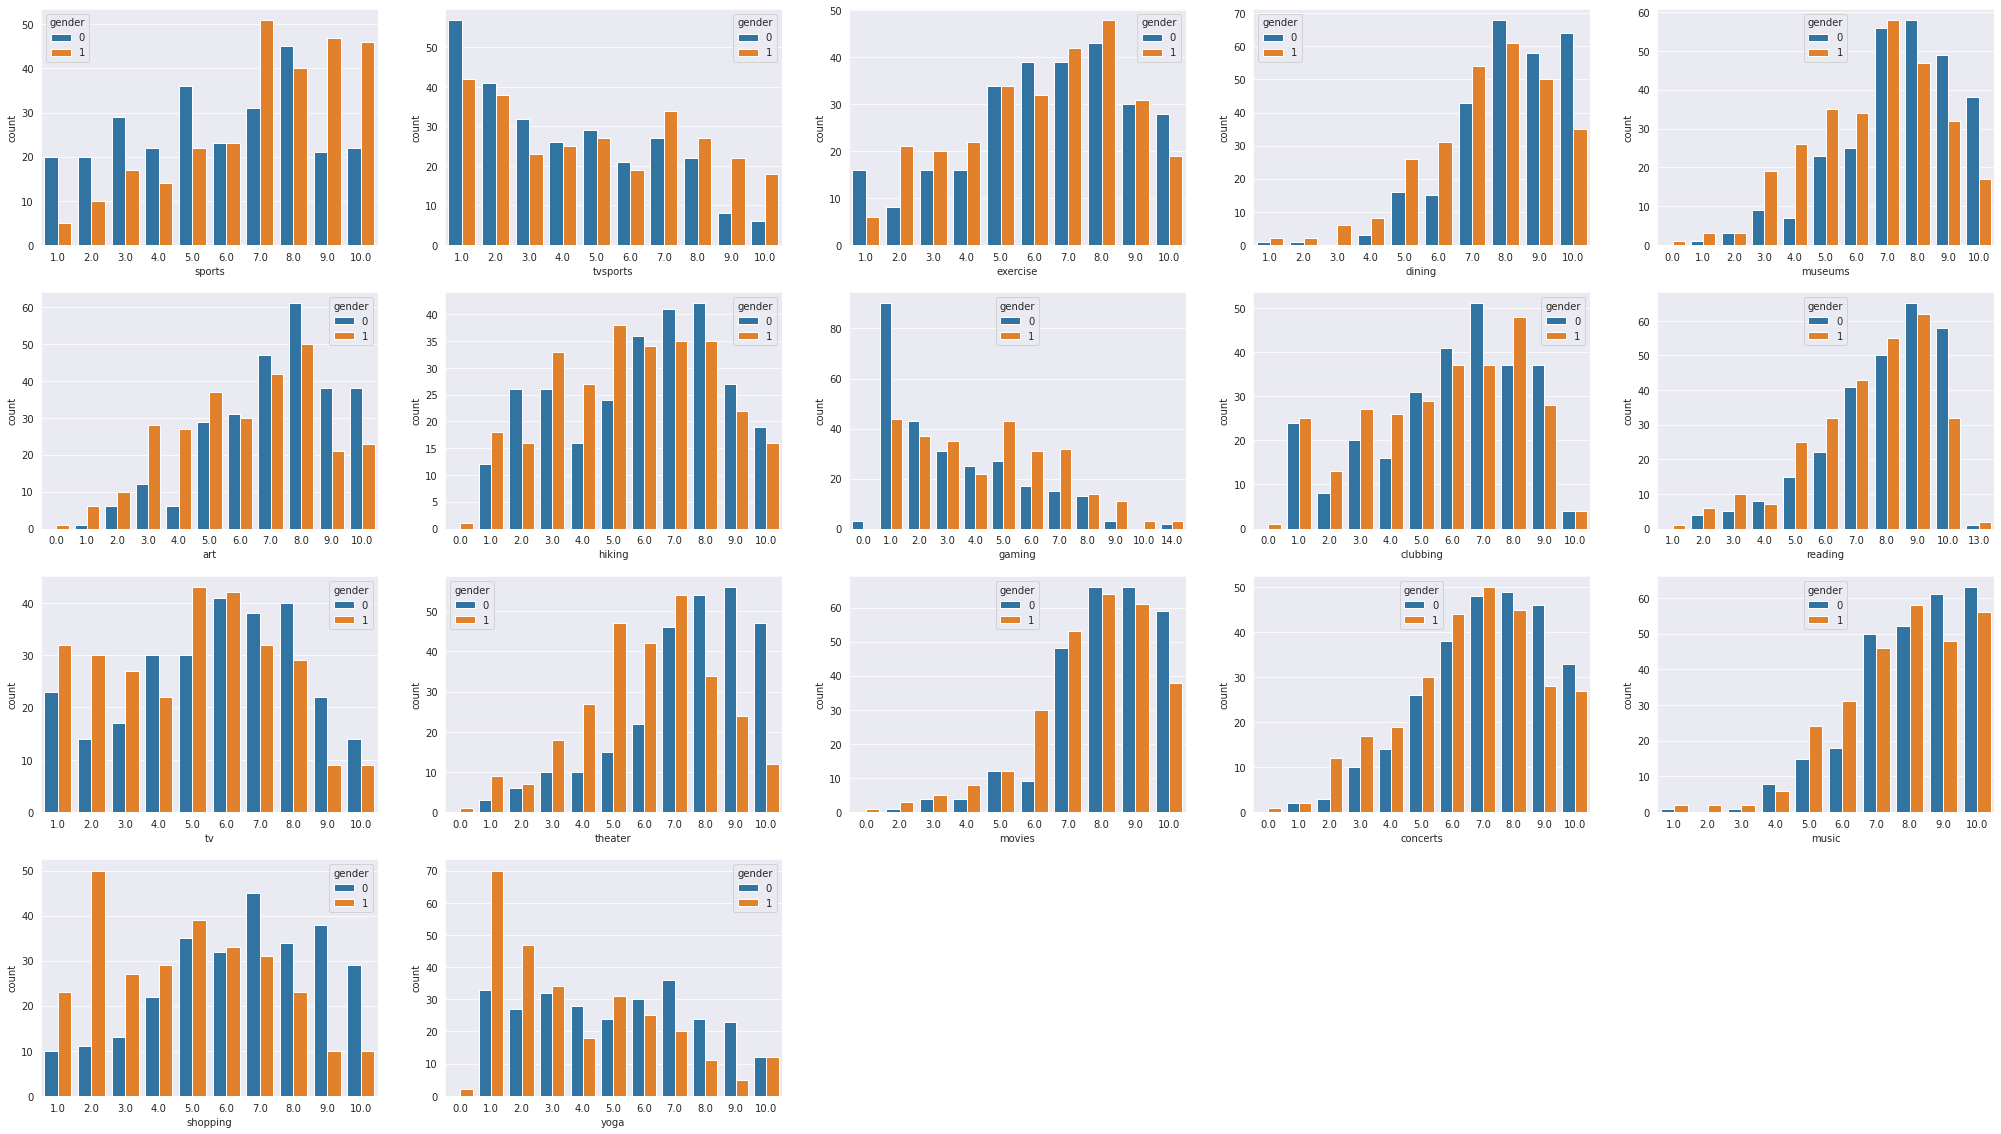

In [183]:
fig, axes = plt.subplots(4,5, figsize=(35,20))

activities = ['sports', 'tvsports','exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing','reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping','yoga']
for i, ax in enumerate(axes.flat) :
    if i < len(activities):
        sns.countplot(data=unique_persons, x=activities[i], hue='gender', ax=ax)
    else :
        ax.axis('off')

#### 3.2 Quantitative variables

In [209]:
dataset.loc[dataset['iid'] == 1, ['dec', 'dec_o', 'like', 'like_o', 'fun', 'fun_o', 'match']]

,dec,dec_o,like,like_o,fun,fun_o,match
0,1,0,7.0,7.0,7.0,8.0,0
1,1,0,7.0,8.0,8.0,7.0,0
2,1,1,7.0,10.0,8.0,10.0,1
3,1,1,7.0,7.0,7.0,8.0,1
4,1,1,6.0,8.0,7.0,6.0,1
5,0,1,6.0,7.0,4.0,8.0,0
6,1,0,6.0,2.0,4.0,5.0,0
7,0,0,6.0,7.0,6.0,6.0,0
8,1,1,7.0,6.5,9.0,8.0,1
9,1,0,6.0,6.0,8.0,6.0,0


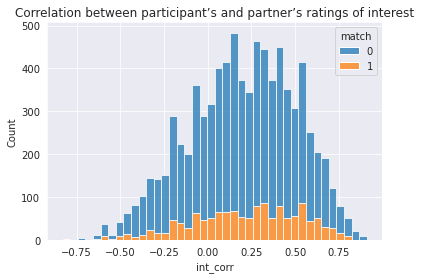

In [187]:
sns.histplot(data=dataset, x='int_corr', hue='match', multiple='stack').set(title='Correlation between participant’s and partner’s ratings of interest');

In [229]:
corr = dataset.corr().loc[:,['match']].sort_values(by='match',ascending=False)
corr

In [244]:
corr_sup025 = corr[(corr['match'] >= 0.25) | (corr['match'] <= -0.25)]
corr_sup025

,match
match,1.000000
dec_o,0.522326
dec,0.521943
like_o,0.305853
like,0.305723
fun_o,0.277700
fun,0.277545
shar_o,0.270840
shar,0.270679
attr_o,0.260837


In [251]:
test = dataset[corr_sup025.index].copy()
test['avg_like'] = (test['like'] + test['like_o']) / 2
test['avg_fun'] = (test['fun'] + test['fun_o']) / 2
test['avg_shar'] = (test['shar'] + test['shar_o']) / 2
test['avg_prob'] = (test['prob'] + test['prob_o']) / 2

In [252]:
test.dropna(inplace=True)
corr = test.corr().loc[:,['match']].sort_values(by='match',ascending=False)
corr

,match
match,1.000000
dec,0.525519
dec_o,0.525519
avg_like,0.417729
avg_fun,0.369862
avg_shar,0.354737
avg_prob,0.336717
like,0.312904
like_o,0.312904
fun,0.280801


<AxesSubplot:>

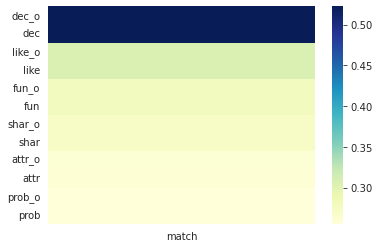

In [231]:
sns.heatmap(corr_sup025, cmap="YlGnBu")